In [ ]:
#This is the python file for testing
from QPE import QPhe_qiskit
from qiskit.circuit.library.standard_gates import HGate

In [ ]:
qphe=QPhe_qiskit(3, 3)
qphe.set_unitary([(HGate(), [0])])
qphe.construct_circuit()
qphe.compute_result()  

In [ ]:
circuit=qphe.circuit

In [ ]:
circuit.draw(output='mpl')

In [ ]:
qphe.show_measure_all(100)

In [ ]:
qphe.show_measure_all(200)

In [1]:
from Algorithm.noise import *

noise_model=construct_bitflip_noise_model(0.1, 0.1, 0.1)

Accuracy of U (|psi1> |000..0> |psi2>) is:  0.9999179096950854
Accuracy of noisy U (|psi1> |000..0> |psi2>) is:  0.855779403975291


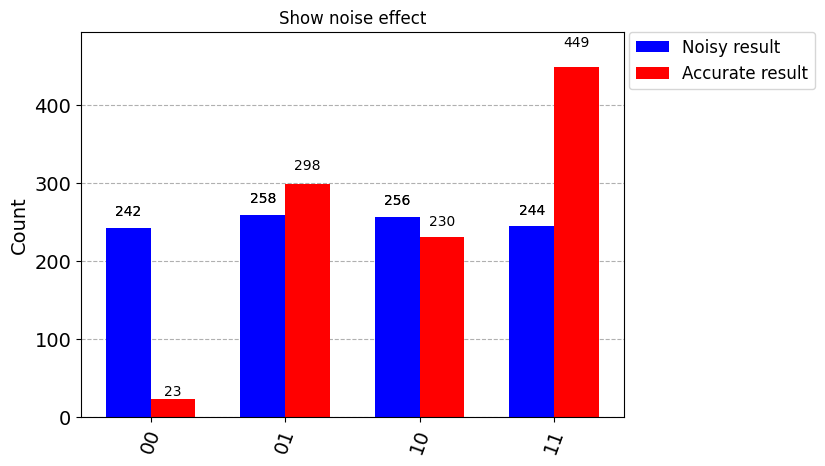

In [2]:
from Dynamic_2qUnitary import Dynamic2Q
import numpy as np
from qiskit.quantum_info import random_statevector

n = 10
u_2q = np.random.randn(4, 4)
u_2q, _, _ = np.linalg.svd(u_2q)

psi1 = random_statevector(2).data
psi2 = random_statevector(2).data

circuit = Dynamic2Q(n, n, u_2q, psi1, psi2)
circuit.construct_circuit()
circuit.compute_result(1000)

circuit.add_noise_model(noise_model)
circuit.show_noise_effect(1000)